In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
url_conflicts = "https://data.humdata.org/dataset/7b36830b-c033-4a06-b812-9940baec603b/resource/23755ad0-1d81-4b10-9e66-23b784ccd429/download/ukraine_hrp_civilian_targeting_events_and_fatalities_by_month-year_as-of-29may2024.xlsx"
url_historical = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRMmUaCgM3NZHrHpewmiXQvPGJDy6dYQOFx1Of6TLxP4NgGHqTLVhwNcvVeVrEBRxo4E6JlGpPxcXhd/pub?gid=2128440595&single=true&output=csv"
url_latest = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRMmUaCgM3NZHrHpewmiXQvPGJDy6dYQOFx1Of6TLxP4NgGHqTLVhwNcvVeVrEBRxo4E6JlGpPxcXhd/pub?gid=0&single=true&output=csv"

resp_conflicts = requests.get(url_conflicts)
with open('./data/test_conflicts.xls', 'wb') as output:
    output.write(resp_conflicts.content)

resp_historical = requests.get(url_historical)
with open('./data/test_historical.csv', 'wb') as output:
    output.write(resp_historical.content)

resp_latest = requests.get(url_latest)
with open('./data/test_latest.csv', 'wb') as output:
    output.write(resp_latest.content)



In [3]:
# Ukraine Conflict Events
conflict_events = pd.read_excel(open('./data/test_conflicts.xls', 'rb'),sheet_name='Data')
# Ukraine Historical Figures
historical_figures = pd.read_csv('./data/test_historical.csv')
# Ukraine Latest Figures
latest_figures = pd.read_csv('./data/test_latest.csv')

In [4]:
historical_figures = historical_figures[historical_figures['crisis_name'] == 'Ukraine']
historical_figures.head(5)

,crisis_index,crisis_name,crisis_iso3,figure_name,figure_source,figure_value,figure_date,figure_url
15872,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,85000,2022-04-25,https://data.unhcr.org/en/situations/ukraine
15873,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,128300,2022-04-27,https://data.unhcr.org/en/situations/ukraine
15874,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,165700,2022-05-03,https://data.unhcr.org/en/situations/ukraine
15875,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,180700,2022-05-09,https://data.unhcr.org/en/situations/ukraine
15876,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,180894,2022-05-18,https://data.unhcr.org/en/situations/ukraine


In [5]:
del historical_figures['crisis_name']
del historical_figures['figure_url']
del historical_figures['crisis_iso3']
historical_figures.head(5)

,crisis_index,figure_name,figure_source,figure_value,figure_date
15872,25,Ukrainian Refugees across Europe,UNHCR,85000,2022-04-25
15873,25,Ukrainian Refugees across Europe,UNHCR,128300,2022-04-27
15874,25,Ukrainian Refugees across Europe,UNHCR,165700,2022-05-03
15875,25,Ukrainian Refugees across Europe,UNHCR,180700,2022-05-09
15876,25,Ukrainian Refugees across Europe,UNHCR,180894,2022-05-18


In [7]:
historical_figures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 15872 to 16837
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crisis_index   966 non-null    int64 
 1   figure_name    966 non-null    object
 2   figure_source  966 non-null    object
 3   figure_value   966 non-null    int64 
 4   figure_date    966 non-null    object
dtypes: int64(2), object(3)
memory usage: 45.3+ KB


In [6]:
historical_figures.describe().T

,count,mean,std,min,25%,50%,75%,max
crisis_index,966.0,2.500000e+01,0.000000e+00,25.0,25.00,25.0,25.00,25.0
figure_value,966.0,2.170386e+06,3.545995e+06,0.0,1653.25,8700.0,5107343.25,17700000.0


In [8]:
historical_figures.isnull().sum()

crisis_index     0
figure_name      0
figure_source    0
figure_value     0
figure_date      0
dtype: int64

In [9]:
historical_figures['figure_name'].value_counts()

figure_name
Ukrainian Refugees across Europe                            199
Civilians Killed since 24 Feb 2022                          153
Civilians Injured since 24 Feb 2022                         153
Civilian Casualties since 24 Feb 2022 (killed & injured)    153
Conflict-related Civilian Injuries (per month)               73
Conflict-related Civilian Deaths (per month)                 73
People Reached (per year)                                    42
People in Need                                               20
People Targeted for Assistance                               19
IDPs                                                         15
Returnees                                                    14
Humanitarian Access Incidents (per month)                    12
Children in Need                                             11
New Displacements by Conflict & Violence (per year)           8
Attacks on Health Care (per year)                             3
Attacks on Health Care: Deat

In [10]:
# Filter the data for Civilians Killed/Injured/Casualties since 24 Feb 2022
civilians_killed = historical_figures[(historical_figures['figure_name'] == 'Civilians Killed since 24 Feb 2022') & (historical_figures['figure_date'] >= '2022-02-24')]
civilians_injured = historical_figures[(historical_figures['figure_name'] == 'Civilians Injured since 24 Feb 2022') & (historical_figures['figure_date'] >= '2022-02-24')]
civilian_casualties = historical_figures[(historical_figures['figure_name'] == 'Civilian Casualties since 24 Feb 2022 (killed & injured)') & (historical_figures['figure_date'] >= '2022-02-24')]

In [11]:
# Convert 'figure_date' to a datetime format
civilians_killed['figure_date'] = pd.to_datetime(civilians_killed['figure_date'])
civilians_injured['figure_date'] = pd.to_datetime(civilians_injured['figure_date'])
civilian_casualties['figure_date'] = pd.to_datetime(civilian_casualties['figure_date'])


C:\Users\tanve\AppData\Local\Temp\ipykernel_1908\3556119057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civilians_killed['figure_date'] = pd.to_datetime(civilians_killed['figure_date'])
C:\Users\tanve\AppData\Local\Temp\ipykernel_1908\3556119057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civilians_injured['figure_date'] = pd.to_datetime(civilians_injured['figure_date'])
C:\Users\tanve\AppData\Local\Temp\ipykernel_1908\3556119057.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

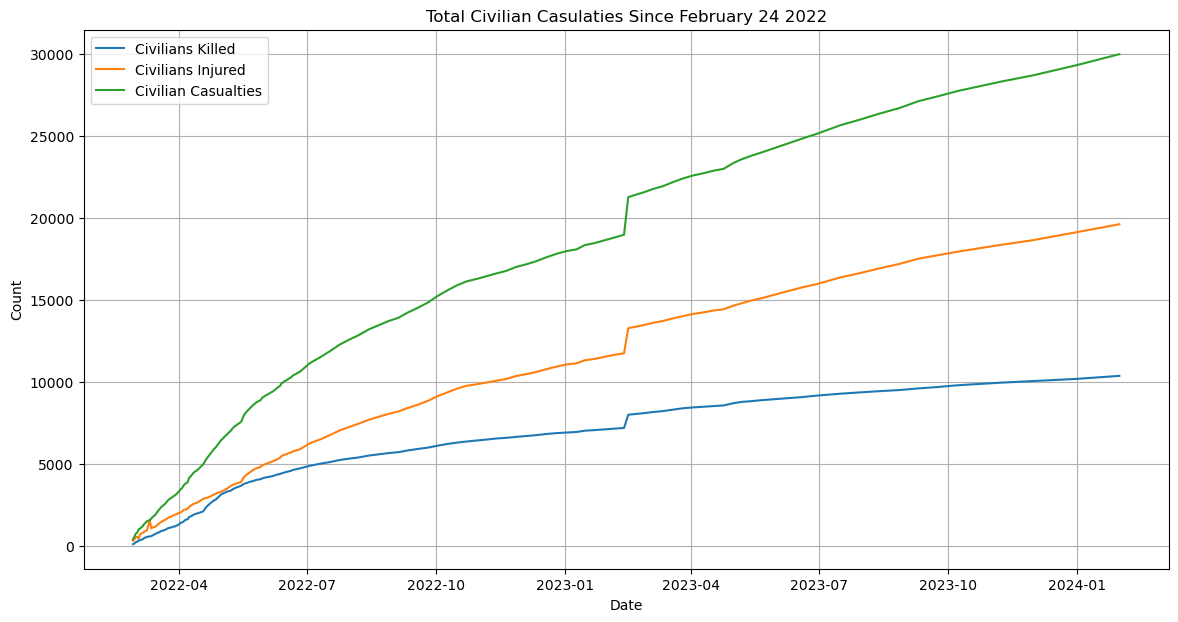

In [13]:
# Create the time series graph
plt.figure(figsize=(14, 7))
plt.plot(civilians_killed['figure_date'], civilians_killed['figure_value'], label='Civilians Killed')
plt.plot(civilians_injured['figure_date'], civilians_injured['figure_value'], label='Civilians Injured')
plt.plot(civilian_casualties['figure_date'], civilian_casualties['figure_value'], label='Civilian Casualties')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Civilian Casulaties Since February 24 2022')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Filter the data for Civilians Killed/Injured/Casualties since 24 Feb 2022
conflict_injuries = historical_figures[(historical_figures['figure_name'] == 'Conflict-related Civilian Injuries (per month)') & (historical_figures['figure_date'] >= '2021-01-01')]
conflict_deaths = historical_figures[(historical_figures['figure_name'] == 'Conflict-related Civilian Deaths (per month)') & (historical_figures['figure_date'] >= '2021-01-01')]


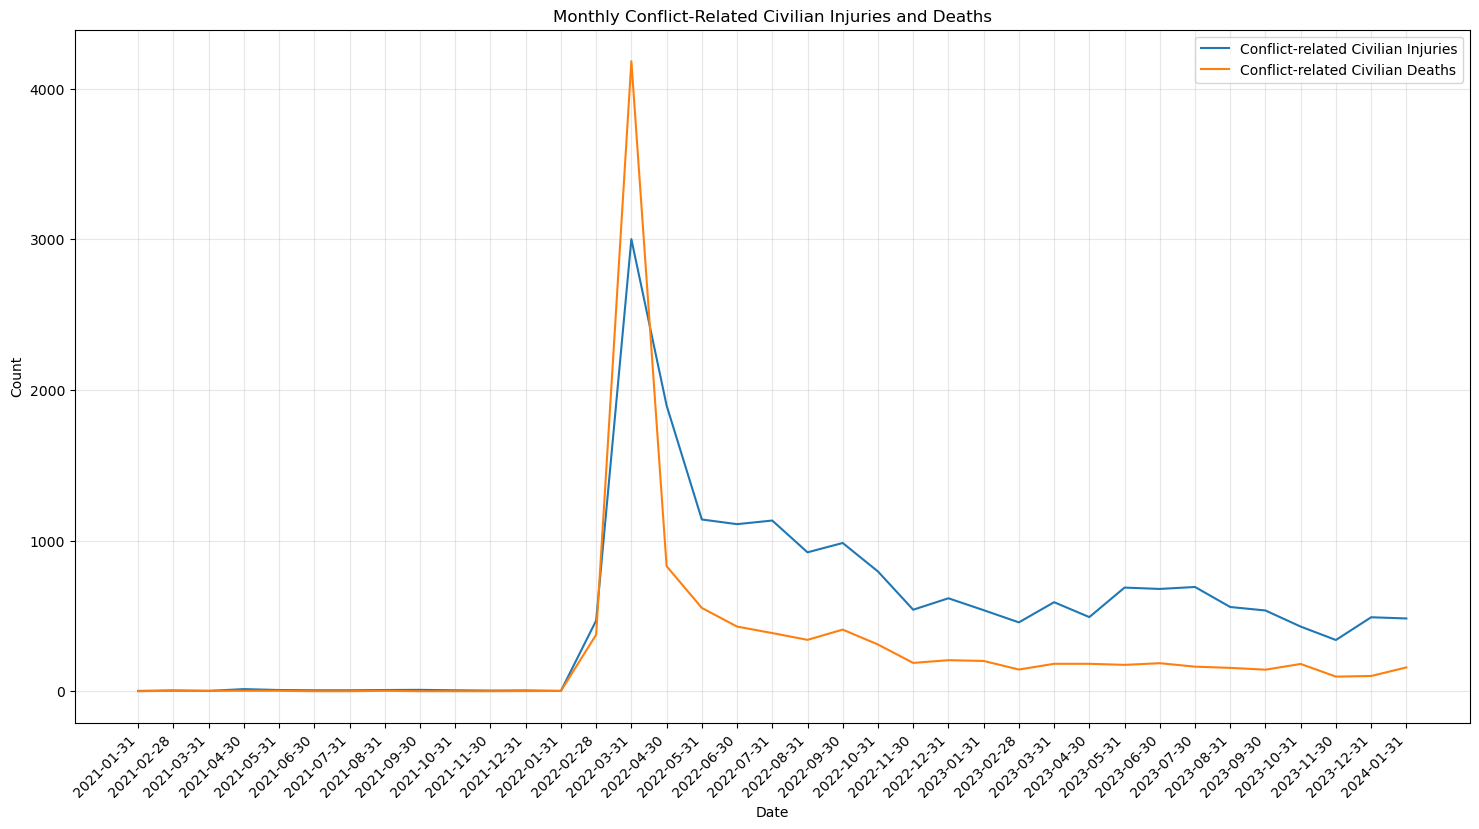

In [24]:

# Create the time series graph
plt.figure(figsize=(18, 9))
plt.plot(conflict_injuries['figure_date'], conflict_injuries['figure_value'], label='Conflict-related Civilian Injuries')
plt.plot(conflict_deaths['figure_date'], conflict_deaths['figure_value'], label='Conflict-related Civilian Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45 , ha='right')
plt.ylabel('Count')
plt.title('Monthly Conflict-Related Civilian Injuries and Deaths')
plt.legend()
plt.grid(axis='both', alpha=0.3)
plt.show()

In [25]:
admin1_data = conflict_events.groupby('Admin1').agg({'Events': 'sum', 'Fatalities': 'sum'}).reset_index()
admin1_data

,Admin1,Events,Fatalities
0,Black Sea,0,0
1,Cherkasy,422,430
2,Chernihiv,2216,5251
3,Chernivtsi,174,0
4,Crimea,1203,1001
5,Dnipropetrovsk,4602,4031
6,Donetsk,18858,19226
7,Ivano-Frankivsk,191,53
8,Kharkiv,15615,15405
9,Kherson,15301,9396


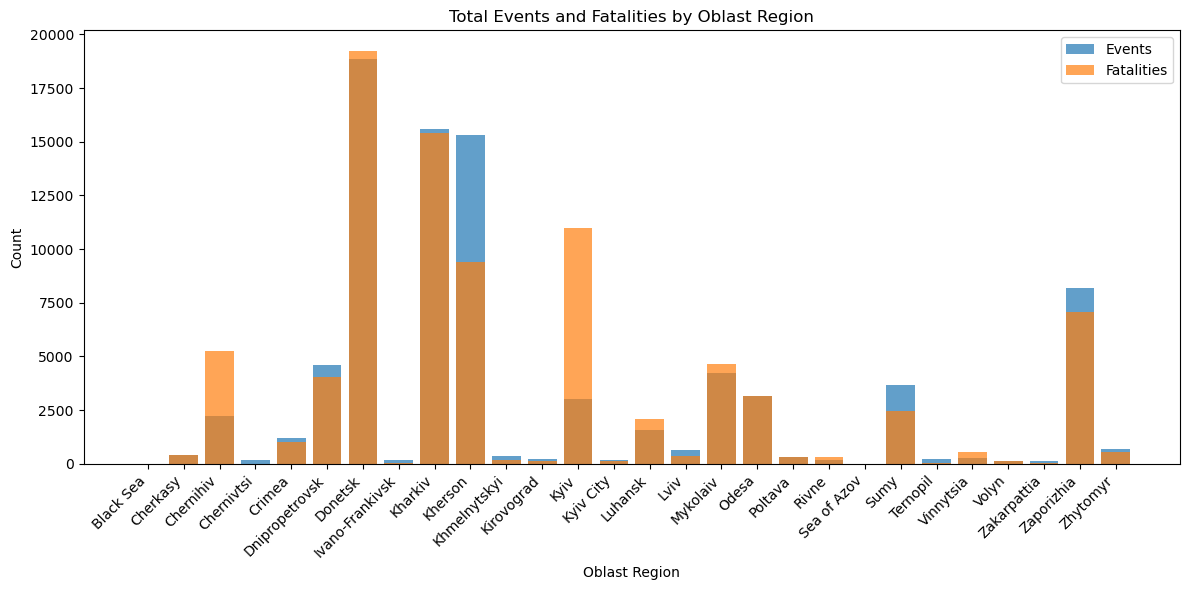

In [28]:
# Total Events and Fatalities by Admin1 (oblast)
plt.figure(figsize=(12, 6))
plt.bar(admin1_data['Admin1'], admin1_data['Events'], label='Events', alpha=0.7)
plt.bar(admin1_data['Admin1'], admin1_data['Fatalities'], label='Fatalities', alpha=0.7)
plt.xlabel('Oblast Region')
plt.ylabel('Count')
plt.title('Total Events and Fatalities by Oblast Region')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()